## Exploracion de datasets

In [1]:
import pandas as pd
from IPython.display import HTML

### 2015

In [143]:
#Load data

primera_vuelta_2015 = pd.concat([pd.read_csv('./escrutinio/2015/FMESPR_0101.csv', ';'),
                            pd.read_csv('./escrutinio/2015/FMESPR_0202.csv', ';'),
                            pd.read_csv('./escrutinio/2015/FMESPR_0313.csv', ';'),
                            pd.read_csv('./escrutinio/2015/FMESPR_1424.csv', ';')])

paso_2017 = pd.concat([pd.read_csv('./escrutinio/2017/paso2017-FMESDN_0101.csv', ';'),
                            pd.read_csv('./escrutinio/2017/paso2017-FMESDN_0202.csv', ';'),
                            pd.read_csv('./escrutinio/2017/paso2017-FMESDN_0313.csv', ';'),
                            pd.read_csv('./escrutinio/2017/paso2017-FMESDN_1424.csv', ';')])

primera_vuelta_2017 = pd.concat([pd.read_csv('./escrutinio/2017/PV_0101.csv', ';'),
                            pd.read_csv('./escrutinio/2017/PV_0202.csv', ';'),
                            pd.read_csv('./escrutinio/2017/PV_0313.csv', ';'),
                            pd.read_csv('./escrutinio/2017/PV_1424.csv', ';')])

COD_PROV = pd.read_csv('./codigos/COD_PROVINCIAS.csv', ';').rename(columns = {'NOMBRE': 'PROVINCIA'})
COD_DEP = pd.read_csv('./codigos/COD_DEPARTAMENTOS.csv', ';').rename(columns = {'NOMBRE': 'DEPARTAMENTO'})

data = dict({131: 'FPV', 135: 'CAMBIEMOS', 137: 'FIT', 132: 'PROGRESISTAS', 133: 'COMP. FEDERAL',
                               9001: 'VOTANTES', 9002: 'EMITIDOS', 9003: 'NA_1', 9004: 'BLANCO', 9005: 'ANULADOS', 9006: 'NA_2'})
COD_listas_2015 = pd.DataFrame(data, index = ['PARTIDO']).T.reset_index()
COD_listas_2015.columns = ['CODIGO VOTOS', 'PARTIDO']

primera_vuelta_2015 = primera_vuelta_2015.merge(COD_PROV).merge(COD_DEP, on = ['CODIGO DEPARTAMENTO', u'CODIGO PROVINCIA']).merge(COD_listas_2015)
primera_vuelta_2015['ELECCION'] = 'PV_2015'
# paso_2017 = paso_2017.merge(COD_PROV).merge(COD_listas_2015)
primera_vuelta_2017 = primera_vuelta_2017.merge(COD_PROV).merge(COD_DEP, on = ['CODIGO DEPARTAMENTO', u'CODIGO PROVINCIA']).merge(COD_listas_2015)
primera_vuelta_2017['ELECCION'] = 'PV_2017'

primera_vuelta = pd.concat([primera_vuelta_2015, primera_vuelta_2017])

#fix
primera_vuelta.columns = primera_vuelta.columns.str.strip()
primera_vuelta['CODIGO CIRCUITO'] = primera_vuelta['CODIGO CIRCUITO'].astype(str).str.strip()

In [148]:
primera_vuelta.loc[primera_vuelta.PROVINCIA == 'CIUDAD AUTONOMA DE BS.AS.']

CODIGO PROVINCIA  CODIGO DEPARTAMENTO CODIGO CIRCUITO  CODIGO MESA  \
0                      1                    1               1            1   
1                      1                    1               1            2   
2                      1                    1               1            3   
3                      1                    1               1            4   
4                      1                    1               1            5   
5                      1                    1               1            6   
6                      1                    1               1            7   
7                      1                    1               1            8   
8                      1                    1               1            9   
9                      1                    1               1           10   
10                     1                    1               1           11   
11                     1                    1               1           12   
12                     1                    1               1           13   
13                     1                    1               1           14   
14                     1                    1               1           15   
15                     1                    1               1           17   
16                     1                    1               1           18   
17                     1                    1               1           19   
18                     1                    1               1           20   
19                     1                    1               1           21   
20                     1                    1               1           22   
21                     1                    1               1           23   
22                     1                    1               1           24   
23                     1                    1               1           25   
24                     1                    1               1           26   
25                     1                    1               1           27   
26                     1                    1               1           28   
27                     1                    1               1           29   
28                     1                    1               1           30   
29                     1                    1               1           31   
30                     1                    1               2           32   
31                     1                    1               2           33   
32                     1                    1               2           34   
33                     1                    1               2           35   
34                     1                    1               2           36   
35                     1                    1               2           37   
36                     1                    1               2           38   
37                     1                    1               2           39   
38                     1                    1               2           41   
39                     1                    1               2           42   
40                     1                    1               2           43   
41                     1                    1               2           44   
42                     1                    1               2           45   
43                     1                    1               2           46   
44                     1                    1               2           47   
45                     1                    1               2           48   
46                     1                    1               2           49   
47                     1                    1               2           50   
48                     1                    1               2           51   
49                     1                    1               2           52   
50                     1      

In [162]:
pd.options.display.max_rows = 9999
df_in = primera_vuelta

votos_total = df_in.groupby(['PROVINCIA', 'DEPARTAMENTO', 'CODIGO CIRCUITO', 'PARTIDO', 'ELECCION'])[['VOTOS']].sum().unstack([-2, -1])['VOTOS']
# resumen_provincial = 100*votos_total.div(votos_total['VOTANTES'], axis = 0).round(4)[['CAMBIEMOS', 'FPV']]
# votos_total[['CAMBIEMOS', 'FPV']].diff(1, 1).diff(2, 1)
diff_votos_ganados_FPV_PRO = votos_total[['CAMBIEMOS', 'FPV']].diff(1, 1).diff(2, 1).iloc[:, 3:].reset_index()
diff_votos_ganados_FPV_PRO.columns = diff_votos_ganados_FPV_PRO.columns.get_level_values(0)

## Shapefile de circuitos electorales

In [159]:
import unidecode
# import geopandas as gpd
# df_list = []

# for n in range(24):
#     try:
#         df_list += [gpd.read_file('./circuitos/circuito_'+str(n).zfill(2)+'/circuito_'+str(n).zfill(2)+'.shp')]
#     except:
#         pass
circuitos = pd.concat(df_list)
circuitos['provincia'] = [unidecode.unidecode(row) for row in circuitos['provincia'].str.upper()]
circuitos['departamen'] = [unidecode.unidecode(row) for row in circuitos['departamen'].str.upper()]
circuitos['provincia'] = circuitos['provincia'].str.replace('CIUDAD AUTONOMA DE BUENOS AIRES', 'CIUDAD AUTONOMA DE BS.AS.')

circuitos.head()

gid distrito                  provincia departamen   cabecera circuito  \
0    3       01  CIUDAD AUTONOMA DE BS.AS.   COMUNA 1   Comuna 1     0003   
1   42       01  CIUDAD AUTONOMA DE BS.AS.   COMUNA 4   Comuna 4     0045   
2   34       01  CIUDAD AUTONOMA DE BS.AS.   COMUNA 3   Comuna 3     0037   
3   17       01  CIUDAD AUTONOMA DE BS.AS.   COMUNA 1   Comuna 1     0018   
4  164       01  CIUDAD AUTONOMA DE BS.AS.  COMUNA 13  Comuna 13     0141   

  indec_p indec_d                                           geometry  
0      02     001  POLYGON ((-58.35729390171709 -34.5951054556839...  
1      02     004  POLYGON ((-58.40154738260488 -34.6468618265473...  
2      02     003  POLYGON ((-58.40097393403207 -34.6186657623277...  
3      02     001  POLYGON ((-58.38000957243059 -34.6221427458695...  
4      02     013  POLYGON ((-58.42519022661396 -34.5491436609710...

In [184]:
circuitos.loc[circuitos.provincia == 'CIUDAD AUTONOMA DE BS.AS.'].circuito.unique()

array([u'0003', u'0045', u'0037', u'0018', u'0141', u'0005', u'0020',
       u'0001', u'0002', u'0011', u'0012', u'0013', u'0014', u'0015',
       u'0016', u'0017', u'0004', u'0006', u'0007', u'0008', u'0009',
       u'0010', u'0021', u'0022', u'0023', u'0024', u'0082', u'0025',
       u'0026', u'0027', u'0028', u'0029', u'0030', u'0031', u'0032',
       u'0033', u'0034', u'0035', u'0036', u'0038', u'0039', u'0040',
       u'0041', u'0042', u'0043', u'0044', u'0046', u'0047', u'0048',
       u'0049', u'0050', u'0051', u'0061', u'0052', u'0053', u'0054',
       u'0065', u'0066', u'0055', u'0056', u'0057', u'0058', u'0059',
       u'0060', u'0062', u'0063', u'0064', u'0067', u'0068', u'0069',
       u'0070', u'0071', u'0072', u'0073', u'0074', u'0075', u'0076',
       u'0077', u'0078', u'0079', u'0080', u'0081', u'0083', u'0084',
       u'0085', u'0086', u'0089', u'0106', u'0090', u'0092', u'0093',
       u'0094', u'0095', u'0096', u'0097', u'0098', u'0099', u'0100',
       u'0103', u'01

In [187]:
diff_votos_ganados_FPV_PRO.loc[diff_votos_ganados_FPV_PRO.PROVINCIA == 'CIUDAD AUTONOMA DE BS.AS.']['CODIGO CIRCUITO'].unique()

array(['1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19',
       '2', '3', '4', '5', '6', '7', '8', '9', '102', '103', '104', '105',
       '106', '107', '108', '109', '110', '111', '112', '113', '114',
       '115', '116', '117', '118', '119', '120', '121', '122', '123',
       '124', '125', '126', '127', '128', '129', '130', '131', '132',
       '133', '134', '135', '136', '137', '138', '139', '140', '141',
       '142', '143', '144', '145', '146', '147', '148', '149', '150',
       '151', '152', '153', '154', '155', '156', '157', '158', '159',
       '160', '161', '162', '163', '164', '165', '166', '167', '20', '21',
       '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32',
       '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43',
       '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54',
       '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65',
       '66', '67', '68', '69', '70', '71', '72', '73', '74', '75',

In [165]:
merged = diff_votos_ganados_FPV_PRO.merge(circuitos[['provincia', 'departamen', 'circuito', 'indec_d']], 
                                 left_on = [u'PROVINCIA', u'DEPARTAMENTO', u'CODIGO CIRCUITO'],
                                right_on = [u'provincia', u'departamen', u'circuito'], how = 'left')

In [170]:
diff_votos_ganados_FPV_PRO.PROVINCIA.unique()

array(['BUENOS AIRES', 'CATAMARCA', 'CHACO', 'CHUBUT',
       'CIUDAD AUTONOMA DE BS.AS.', 'CORDOBA', 'CORRIENTES', 'ENTRE RIOS',
       'FORMOSA', 'JUJUY', 'LA PAMPA', 'LA RIOJA', 'MENDOZA', 'MISIONES',
       'NEUQUEN', 'RIO NEGRO', 'SALTA', 'SAN JUAN', 'SAN LUIS',
       'SANTA CRUZ', 'SANTA FE', 'SANTIAGO DEL ESTERO', 'TIERRA DEL FUEGO',
       'TUCUMAN'], dtype=object)

In [172]:
merged.loc[merged.PROVINCIA.isin(['CIUDAD AUTONOMA DE BS.AS.'])].sample(100)

PROVINCIA DEPARTAMENTO CODIGO CIRCUITO     FPV  \
1627  CIUDAD AUTONOMA DE BS.AS.    COMUNA 10             104  -523.0   
1736  CIUDAD AUTONOMA DE BS.AS.     COMUNA 5              65  -170.0   
1709  CIUDAD AUTONOMA DE BS.AS.     COMUNA 3              38  -188.0   
1641  CIUDAD AUTONOMA DE BS.AS.    COMUNA 11             118  -492.0   
1630  CIUDAD AUTONOMA DE BS.AS.    COMUNA 10             107  -501.0   
1682  CIUDAD AUTONOMA DE BS.AS.    COMUNA 15             159   -56.0   
1728  CIUDAD AUTONOMA DE BS.AS.     COMUNA 4              57  -418.0   
1759  CIUDAD AUTONOMA DE BS.AS.     COMUNA 8              88  -696.0   
1694  CIUDAD AUTONOMA DE BS.AS.     COMUNA 2              23  -512.0   
1683  CIUDAD AUTONOMA DE BS.AS.    COMUNA 15             160  -396.0   
1757  CIUDAD AUTONOMA DE BS.AS.     COMUNA 7              86   438.0   
1699  CIUDAD AUTONOMA DE BS.AS.     COMUNA 2              28  -510.0   
1714  CIUDAD AUTONOMA DE BS.AS.     COMUNA 4              43  -228.0   
1671  CIUDAD AUTONOMA DE BS.AS.    COMUNA 14             148  -634.0   
1665  CIUDAD AUTONOMA DE BS.AS.    COMUNA 13             142  -933.0   
1613  CIUDAD AUTONOMA DE BS.AS.     COMUNA 1              16  -120.0   
1672  CIUDAD AUTONOMA DE BS.AS.    COMUNA 14             149  -651.0   
1765  CIUDAD AUTONOMA DE BS.AS.     COMUNA 9              92  -463.0   
1675  CIUDAD AUTONOMA DE BS.AS.    COMUNA 14             152  -595.0   
1614  CIUDAD AUTONOMA DE BS.AS.     COMUNA 1              17   -51.0   
1624  CIUDAD AUTONOMA DE BS.AS.     COMUNA 1               9  -345.0   
1629  CIUDAD AUTONOMA DE BS.AS.    COMUNA 10             106  -443.0   
1676  CIUDAD AUTONOMA DE BS.AS.    COMUNA 14             153  -571.0   
1664  CIUDAD AUTONOMA DE BS.AS.    COMUNA 13             141  -328.0   
1606  CIUDAD AUTONOMA DE BS.AS.     COMUNA 1               1   -85.0   
1710  CIUDAD AUTONOMA DE BS.AS.     COMUNA 3              39  -271.0   
1658  CIUDAD AUTONOMA DE BS.AS.    COMUNA 13             135  -182.0   
1678  CIUDAD AUTONOMA DE BS.AS.    COMUNA 14             155  -260.0   
1668  CIUDAD AUTONOMA DE BS.AS.    COMUNA 13             145  -405.0   
1700  CIUDAD AUTONOMA DE BS.AS.     COMUNA 2              29  -276.0   
1703  CIUDAD AUTONOMA DE BS.AS.     COMUNA 3              32  -281.0   
1746  CIUDAD AUTONOMA DE BS.AS.     COMUNA 7              75  -360.0   
1738  CIUDAD AUTONOMA DE BS.AS.     COMUNA 5              67  -213.0   
1725  CIUDAD AUTONOMA DE BS.AS.     COMUNA 4              54  -216.0   
1670  CIUDAD AUTONOMA DE BS.AS.    COMUNA 13             147  -475.0   
1772  CIUDAD AUTONOMA DE BS.AS.     COMUNA 9              99  -652.0   
1684  CIUDAD AUTONOMA DE BS.AS.    COMUNA 15             161  -199.0   
1701  CIUDAD AUTONOMA DE BS.AS.     COMUNA 3              30  -256.0   
1631  CIUDAD AUTONOMA DE BS.AS.    COMUNA 10             108  -338.0   
1719  CIUDAD AUTONOMA DE BS.AS.     COMUNA 4              48  -295.0   
1717  CIUDAD AUTONOMA DE BS.AS.     COMUNA 4              46   154.0   
1749  CIUDAD AUTONOMA DE BS.AS.     COMUNA 7              78  -355.0   
1761  CIUDAD AUTONOMA DE BS.AS.     COMUNA 8              90  -667.0   
1620  CIUDAD AUTONOMA DE BS.AS.     COMUNA 1               5   498.0   
1724  CIUDAD AUTONOMA DE BS.AS.     COMUNA 4              53    29.0   
1649  CIUDAD AUTONOMA DE BS.AS.    COMUNA 12             126  -500.0   
1652  CIUDAD AUTONOMA DE BS.AS.    COMUNA 12             129  -420.0   
1752  CIUDAD AUTONOMA DE BS.AS.     COMUNA 7              81  -243.0   
1697  CIUDAD AUTONOMA DE BS.AS.     COMUNA 2              26  -751.0   
1680  CIUDAD AUTONOMA DE BS.AS.    COMUNA 14             157   -22.0   
1634  CIUDAD AUTONOMA DE BS.AS.    COMUNA 10             111  -374.0   
1609  CIUDAD AUTONOMA DE BS.AS.     COMUNA 1              12  -234.0   
1607  CIUDAD AUTONOMA DE BS.AS.     COMUNA 1              10  -360.0   
1758  CIUDAD AUTONOMA DE BS.AS.     COMUNA 8              87   262.0   
1628  CIUDAD AUTONOMA DE BS.AS.    COMUNA 10             105  

In [55]:
COD_PROV_circuitos = circuitos[['provincia', 'indec_p']].drop_duplicates().sort_values(by = 'provincia').reset_index(drop = True)
# pd.concat([COD_PROV, COD_PROV_circuitos],axis = 1)
COD_PROV_circuitos

provincia indec_p
0  CIUDAD AUTONOMA DE BUENOS AIRES      02
0                     BUENOS AIRES      06
0                          CORDOBA      14
0                       CORRIENTES      18
0                            CHACO      22
0                           CHUBUT      26
0                       ENTRE RIOS      30
0                            JUJUY      38
0                         LA PAMPA      42
0                          MENDOZA      50
0                         MISIONES      54
0                          NEUQUEN      58
0                        RIO NEGRO      01
0                            SALTA      66
0                         SAN JUAN      70
0                         SAN LUIS      74
0                         SANTA FE      82
0              SANTIAGO DEL ESTERO      86
0                          TUCUMAN      90

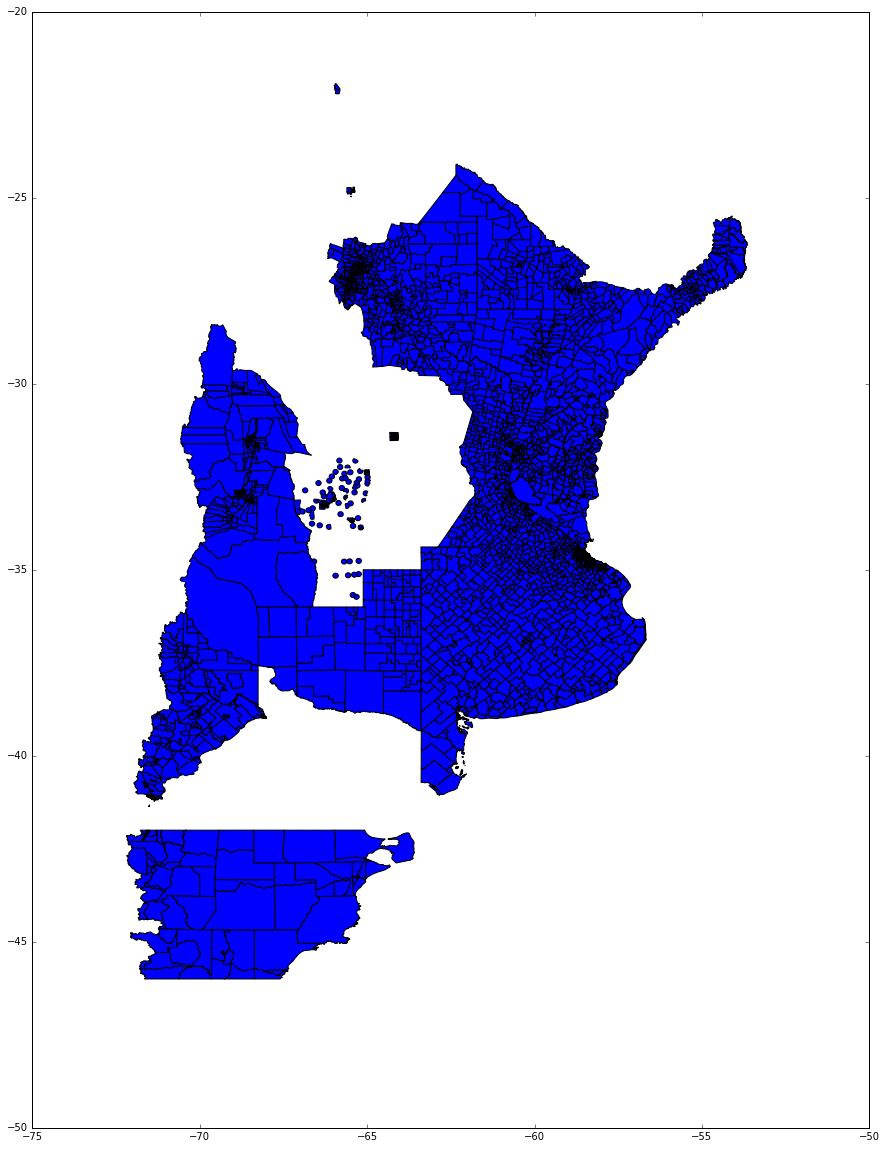

In [40]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(1, figsize = (15, 20))
circuitos.sort_values(by = ['circuito']).plot(ax = ax)

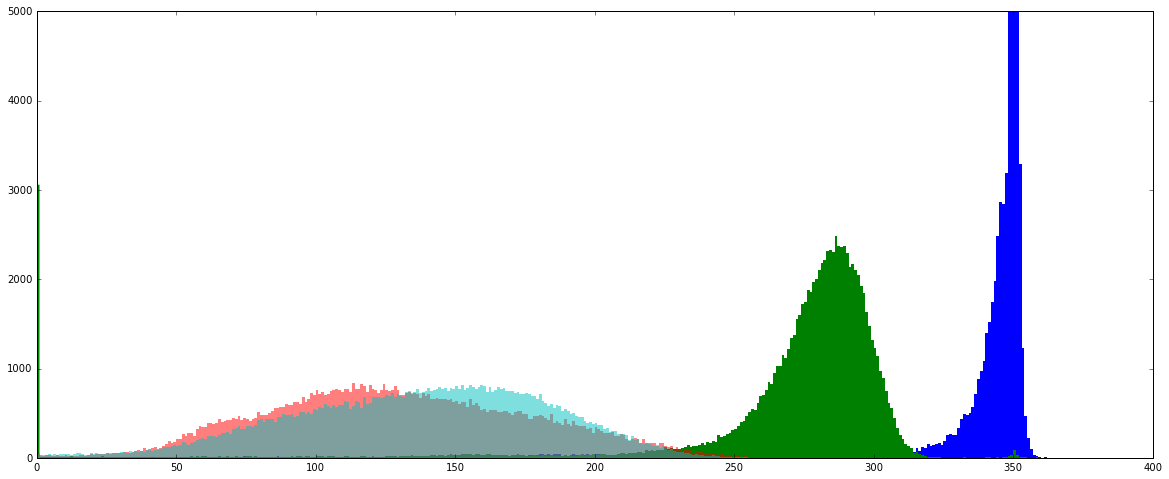

In [219]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(1, figsize = (20, 8))
ax.hist(primera_vuelta.loc[primera_vuelta['CODIGO VOTOS'] == 9001]['VOTOS'], range(400), linewidth = 0)
ax.hist(primera_vuelta.loc[primera_vuelta['CODIGO VOTOS'] == 9002]['VOTOS'], range(400), linewidth = 0)
ax.hist(primera_vuelta.loc[primera_vuelta['CODIGO VOTOS'] == 131]['VOTOS'], range(400), linewidth = 0, alpha = .5)
ax.hist(primera_vuelta.loc[(primera_vuelta['CODIGO VOTOS'] == 135)]['VOTOS'], range(400), linewidth = 0, alpha = .5)
plt.ylim(0, 5000)
plt.show()

In [63]:
segunda_vuelta['CODIGO VOTOS'].unique()

array([9001, 9002, 9003, 9004, 9005, 9006,  131,  135])

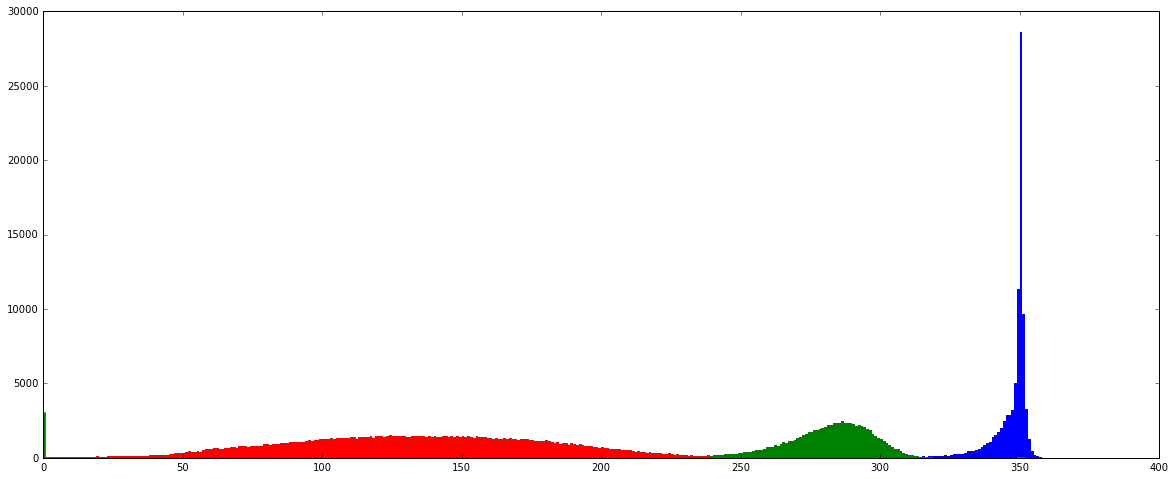

In [64]:
fig, ax = plt.subplots(1, figsize = (20, 8))
ax.hist(segunda_vuelta.loc[segunda_vuelta['CODIGO VOTOS'] == 9001]['VOTOS'], range(400), linewidth = 0)
ax.hist(segunda_vuelta.loc[segunda_vuelta['CODIGO VOTOS'] == 9002]['VOTOS'], range(400), linewidth = 0)
ax.hist(segunda_vuelta.loc[(segunda_vuelta['CODIGO VOTOS'] == 131) |
                          (segunda_vuelta['CODIGO VOTOS'] == 135)]['VOTOS'], range(400), linewidth = 0)
plt.show()

## Unir circuitos con votos

In [155]:
#Debugging para tratar de que matcheen los circuitos entre la tabla de shapefiles y la de conteo de votos.

circuitos.loc[circuitos.distrito.isin(['02'])].circuito.str.len().value_counts()#.iloc[:, :-1].nunique()

4    932
5    249
Name: circuito, dtype: int64

In [117]:
votos_por_circuito.loc[votos_por_circuito['CODIGO PROVINCIA'].isin([1, 2])].drop_duplicates().sample(5)#.reset_index().nunique()

CODIGO PROVINCIA  CODIGO DEPARTAMENTO CODIGO CIRCUITO     CODIGO VOTOS  \
1103                 1                   13                138          9006   
3562                 2                   35              0773A          9001   
1000                 1                   12                126           131   
3647                 2                   36              0287C          9006   
4402                 2                   52              0382           9001   

      VOTOS  
1103     10  
3562  55567  
1000   4975  
3647      0  
4402   6269

In [170]:
# Veamos que tan largos son los codigos de circuito segun la provincia, para ver si hace falta agregar un cero delante o algo asi...

votos_por_circuito.loc[votos_por_circuito['CODIGO PROVINCIA'] == [2]][[
        'CODIGO PROVINCIA', 'CODIGO DEPARTAMENTO', 'circuito']].drop_duplicates()['circuito'].str.strip().str.len().value_counts()

4    829
5    242
Name: circuito, dtype: int64

### Ahora si...

In [178]:
## Conclusion, definir las siguientes columnas:

votos_por_circuito['circuito'] = votos_por_circuito['CODIGO CIRCUITO   '].astype(str).str.strip().str.zfill(4)
votos_por_circuito['distrito'] = votos_por_circuito['CODIGO PROVINCIA'].astype(str).str.zfill(2)

merged = votos_por_circuito.merge(circuitos[['circuito', 'distrito','geometry']])

#pasar a porcentajes:

merged['VOTOS_pct'] = merged.groupby(['distrito', 'circuito'])['VOTOS'].apply(lambda x: 100*x/x.sum())


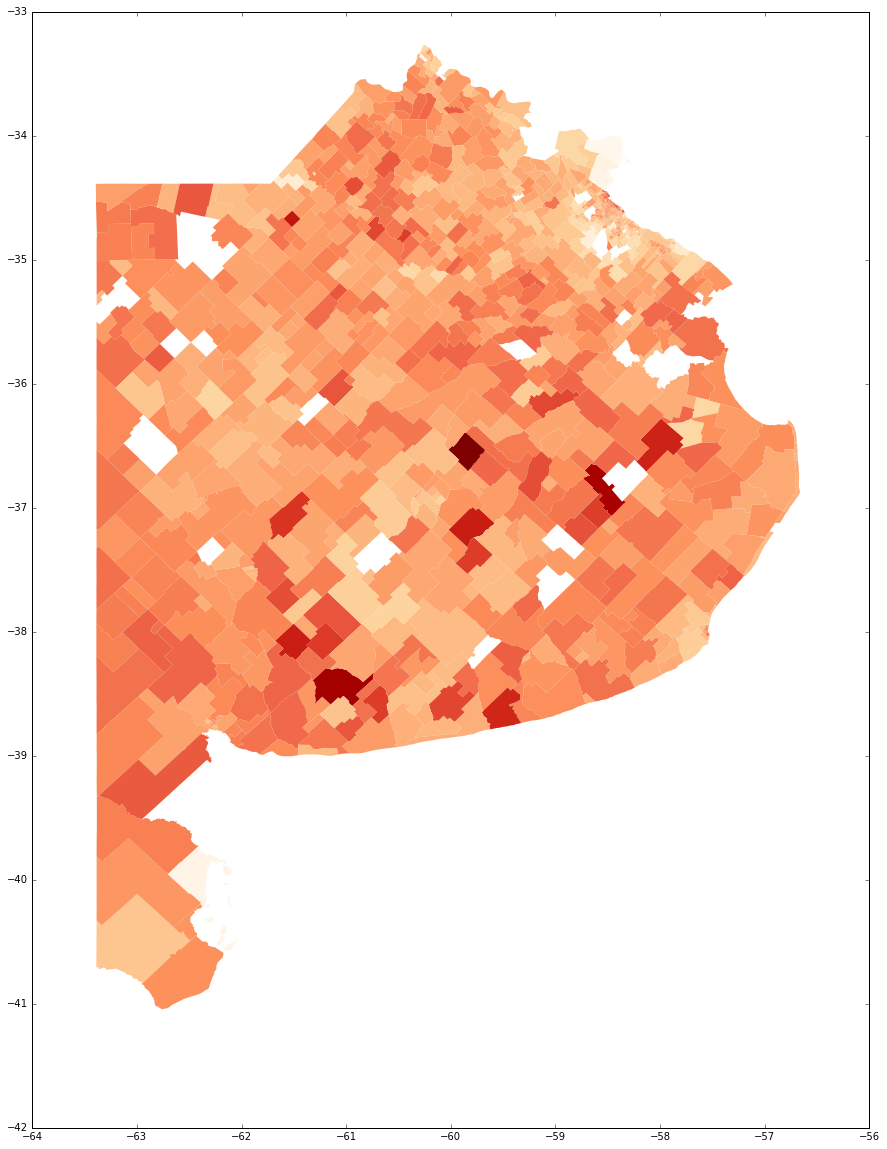

In [213]:
BA = merged.loc[votos_por_circuito['distrito'].isin(['01', '02'])]

fig, ax = plt.subplots(1, figsize = (15, 20))
gpd.GeoDataFrame(BA.loc[BA['CODIGO VOTOS'] == 135]).plot(column='VOTOS_pct', ax = ax, linewidth = 0, cmap='OrRd')

(-35.2, -34)

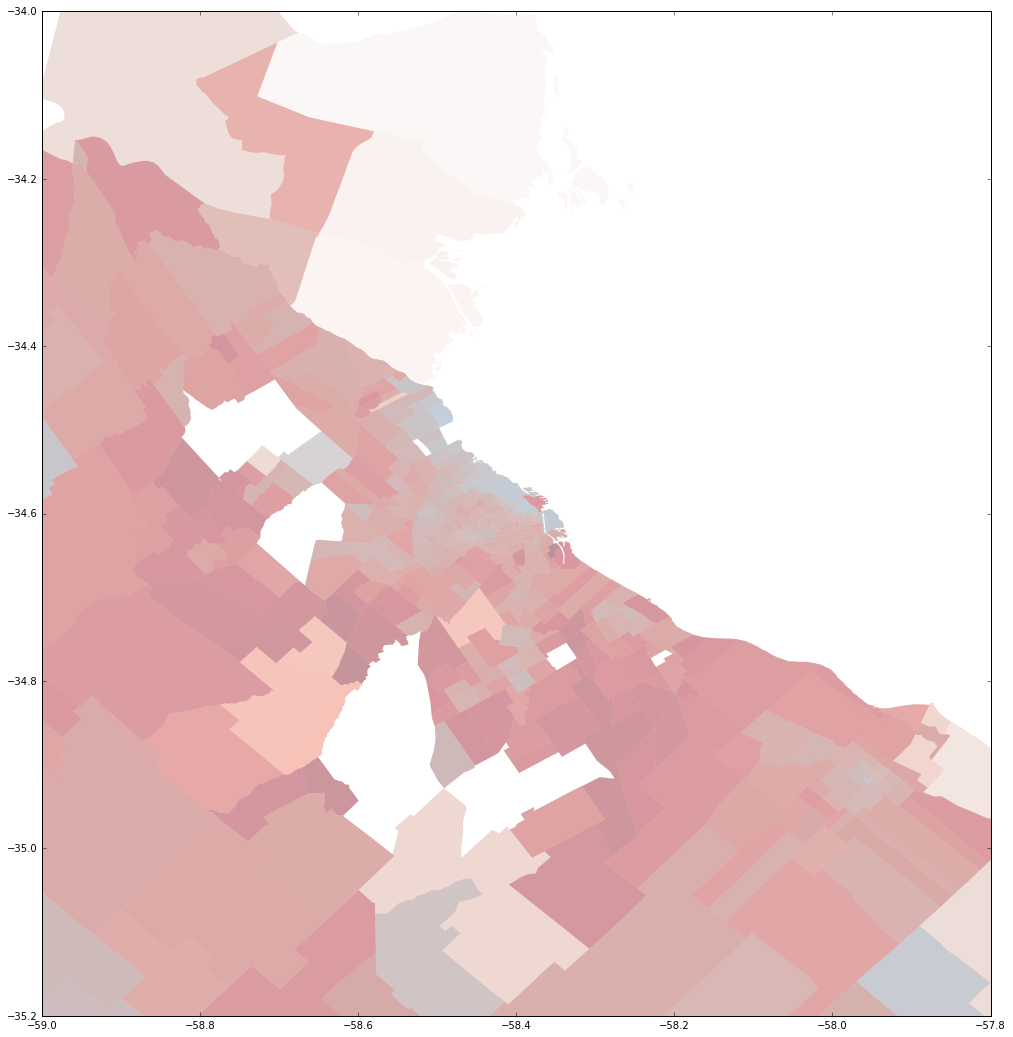

In [221]:
fig, ax = plt.subplots(1, figsize = (17, 18))
gpd.GeoDataFrame(BA.loc[BA['CODIGO VOTOS'] == 135]).plot(column='VOTOS_pct', ax = ax, linewidth = 0, cmap='Blues', alpha = .5)
gpd.GeoDataFrame(BA.loc[BA['CODIGO VOTOS'] == 131]).plot(column='VOTOS_pct', ax = ax, linewidth = 0, cmap='Reds', alpha = .4)
ax.set_xlim(-59, -57.8)
ax.set_ylim(-35.2, -34)